# Multi-Armed Bandit Problems

The main topic for today are multi-armed bandit problems. Let us start first by recapping our inequalities for tail probabilities from last lecture. 

## Recap from Last Lecture: Probability Inequalities

### Right-Tail and Left-Tail Probabilities

Given a random variable $X$ with mean $\mu = \mathbb{E}(X)$, probabilities of the form $\mathbb{P}\{X \geq t\}$ for $t \geq \mu$ are called right tail probabilities, and probabilities of the form $\mathbb{P}\{X \leq t\}$ for $t \leq \mu$ are called left tail probabilities. The most important upper bound for right-tail probabilities is the Chernoff bound given by: 
\begin{align*}
  \mathbb{P} \{X \geq t\} \leq \min_{\lambda \geq 0} \frac{\mathbb{E} e^{\lambda X}}{e^{\lambda t}}. 
\end{align*}
This bound is valid for all $X$ and is obtained by applying Markov's inequality to the nonnegative random variable $e^{\lambda X}$. One can obtain a version of this inequality for left-tail probabilities by simply noting that any left-tail probability for $X$ is simply a right-tail probability for $-X$. This gives:
\begin{align*}
  \mathbb{P}\{X \leq t\} = \mathbb{P}\{-X \geq -t\} \leq \min_{\lambda
  \geq 0}\frac{\mathbb{E} e^{\lambda(-X)}}{e^{\lambda(-t)}}.  
\end{align*}
Note here that $t \leq \mu$ implies that $-t \geq -\mu$ so that
$\mathbb{P}\{-X \geq -t\}$ is a right tail probability for $-X$. 

### Chernoff and Hoeffding Right-Tail Bounds for Binomial

An important example for Chernoff bounds is the case when $X$ is binomial. Suppose $X \sim \text{Binomial}(n, p)$ and $t \geq np$. Then, as we saw in the last lecture, the Chernoff bound for $X$ becomes:
\begin{align*}
  \mathbb{P} \{X \geq t\} \leq \exp \left(-n D(t/n, p) \right) ~~~ \text{ where } D(\rho, p) := \rho \log \frac{\rho}{p} + (1-\rho)\log \frac{1-\rho}{1-p}\tag{Chernoff for Binomial}
\end{align*}
The quantity $D(t/n, p)$ is a measure of how far $t/n$ is from $p$. This appears with a negative sign (and a factor of $n$) in the exponent for the bound, which implies that the tail probability becomes very small when $t/n$ is far from $p$. A simpler-looking inequality can be further derived from the Chernoff bound by a second order Taylor expansion which bounds $D(t/n, p)$ by a quadratic. This leads to the Hoeffding bound for the Binomial right-tail: 
\begin{align*}
   \mathbb{P}\{X \geq t\} \leq \exp \left(-2\frac{(t - np)^2}{n} \right) \tag{Hoeffding for Binomial}
\end{align*}
It should be noted that both the Chernoff and Hoeffding Bounds are only crude upper bounds, and they can be quite off in any particular scenario. The Chernoff bound will be more accurate compared to the Hoeffding bound. As a simple consequence of the Hoeffding bound, we can derive a value of $t$ which guarantees that $\mathbb{P}\{X = \text{Bin}(n, p) \geq t\}$ is bounded from above by $\delta$, for a predetermined level $\delta$ (e.g., $\delta = 0.1$ or $\delta = 0.05$). This can be done by simply equating the right hand side of Hoeffding's inequality to $\delta$ and solving for $t$:
\begin{align*}
    \exp \left(-2\frac{(t - np)^2}{n} \right) = \delta \iff (t - np)^2 = \frac{n}{2} \log \frac{1}{\delta}
\end{align*}
Because we are dealing with right tail probabilities, $t \geq np$ so that we can write the above as
\begin{align*}
   t - np = \sqrt{\frac{n}{2} \log \frac{1}{\delta}} \iff t = np + \sqrt{\frac{n}{2} \log \frac{1}{\delta}}. 
\end{align*}
We thus obtain
\begin{align*}
  \mathbb{P}\{X \geq np + \sqrt{\frac{n}{2} \log \frac{1}{\delta}}\} \leq \delta ~~ \text{ or, equivalently } ~~  \mathbb{P}\{X < np + \sqrt{\frac{n}{2} \log \frac{1}{\delta}}\} \geq 1 - \delta
\end{align*}

### General Hoeffding

A Binomial$(n, p)$ random variable $X$ can be written as $X_1 + \dots + X_n$ where $X_i \overset{\text{i.i.d}}{\sim} \text{Ber}(p)$. This means that $X$ is a sum of independent bounded random variables. There is a more general version of Hoeffding's inequality which holds for sums of independent arbitrary bounded random variables. Suppose $X_1, \dots, X_n$ are independent random variables that are all bounded between two fixed real numbers $a$ and $b$. Suppose $\mu_i := \mathbb{E}(X_i)$. Let $X = X_1 + \dots + X_n$ and note that $X$ has mean equal to $\mu_1 + \dots + \mu_n$. The general version of Hoeffding's inequality is:
\begin{align*}
  \mathbb{P}\{X \geq t\} \leq \exp \left(-\frac{2(t - \sum_{i=1}^n \mu_i)^2}{n(b-a)^2} \right) ~~ \text{ provided } t \geq \sum_{i=1}^n \mu_i. \tag{General Hoeffding}
\end{align*}

### Hoeffding Left Tail Bounds for Binomial

The General Hoeffding bound immediately gives a left-tail probability bound for Binomial$(n, p)$. Suppose $X \sim \text{Binomial}(n, p)$ and we want to get upper bounds for $\mathbb{P}\{X \leq t\}$ for some $t \leq np$. We can write $X = X_1 + \dots + X_n$ for i.i.d Bernoulli$(p)$ random variables $X_1, \dots, X_n$. Then
\begin{align*}
  \mathbb{P} \{X \leq t\} &= \mathbb{P} \{X_1 + \dots + X_n \leq t\} = \mathbb{P} \{(-X_1) + \dots + (-X_n) \geq -t\}.
\end{align*}
Hoeffding's inequality applied to $-X_1, \dots, -X_n$ (which are bounded between $-1$ and 0; also note $-t \geq -np$) gives
\begin{align*}
  \mathbb{P} \{X \leq t\} &= \mathbb{P} \{(-X_1) + \dots + (-X_n) \geq -t\} \leq \exp \left(-2\frac{(t - np)^2}{n} \right). 
\end{align*}
We thus get the same upper bound that we got for the upper tail probability. Using this bound, we can find an explicit value of $t$ such that $\mathbb{P} \{X = \text{Bin}(n, p) \leq t\}$ is atmost a predetermined level $\delta$. For this, all we need to do is to solve the following equation for $t$:
\begin{align*}
    \exp \left(-2\frac{(t - np)^2}{n} \right) = \delta \iff (t - np)^2 = \frac{n}{2} \log \frac{1}{\delta}
\end{align*}
Because $t \leq np$, the above is further equivalent to
\begin{align*}
   np - t = \sqrt{\frac{n}{2} \log \frac{1}{\delta}} \iff t = np - \sqrt{\frac{n}{2} \log \frac{1}{\delta}}. 
\end{align*}
We thus get
\begin{align*}
  \mathbb{P}\{X = \text{Bin}(n, p) \leq np - \sqrt{\frac{n}{2} \log \frac{1}{\delta}}\} \leq \delta
\end{align*}
or equivalently
\begin{align*}
   \mathbb{P}\{p < \frac{X}{n} + \sqrt{\frac{\log 1/\delta}{2n}}\} \geq 1-\delta.
\end{align*}
The bound on $p$ given above is sometimes referred to as the **Upper Confidence Bound (UCB)** for $p$:
\begin{align*}
   UCB(\delta) := \frac{X}{n} + \sqrt{\frac{\log 1/\delta}{2n}}.
\end{align*}
Thus $\mathbb{P}\{p < UCB(\delta)\} \geq 1-\delta$. 
We would like to reiterate that Hoeffding's inequality can be quite loose which would mean that the UCB can be too conservative as an upper bound for $p$. For example, suppose $n = 100$, $p = 0.5$ and $\delta = 0.1$. Then it can be checked (see code below) that $\mathbb{P}\{X = \text{Bin}(n, p) \leq np - \sqrt{\frac{n}{2} \log \frac{1}{\delta}}\}$ is around 0.017 so saying that it is smaller than 0.1 is somewhat crude.

In [1]:
import numpy as np
delt = 0.1
p = 0.5
n = 100
t = n*p - np.sqrt((n/2)*(np.log(1/delt)))

#The actual probability that Bin(n, p) is smaller than t can be computed as
from scipy.stats import binom
print(binom.cdf(t, n, p))
#Note that this is quite smaller (more than a factor of 5 compared to delt)
print(delt/binom.cdf(t, n, p))

0.017600100108852428
5.681785863803264


## Multi-Armed Bandit Problems

Consider the following simple problem. I have $K$ coins with different success probabilities $p_1, \dots, p_K$. Assume that you do not know the specific values of $p_1, \dots, p_K$. We will now play a game for a large number ($T$) of rounds. In each round, you would pick one of the coins. I would then toss the coin that you picked. If the coin toss is 'heads', you will get $\$ 1$. If the coin toss is 'tails', you will get $\$ 0$. Your goal is to win as many dollars as possible. What strategy would you use to play this game?

You should obviously try to pick the coin with the highest success probability (i.e., the highest value of $p_i$) and just keep tossing that coin. Unfortunately, the values $p_1, \dots, p_K$ are unknown to you. You should try to learn the values of these unknown parameters as you play through the rounds. There is therefore an exploration-exploitation aspect to playing this game. In the exploration phase, the focus is on learning the values of $p_1, \dots, p_K$. In the exploitation phase, the focus is on sticking with the coin with the highest value of $p_i$ estimated from the data obtained previously.

For concreteness, suppose there are $K = 9$ coins with success probabilities $0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9$ i.e., $p_i := i*(0.1)$. Assume that we will play the game for $T = 1000$ rounds. If you knew the success probabilities, you will pick the coin with success probability 0.9 for tossing in each round. This will lead to an expected reward of $\$ 900$. This is the maximum possible reward you can expect to earn in this game. Because you do not know the success probabilities, you might realistically expect to earn something smaller than $\$ 900$. But how close to $\$ 900$ can you try to get?

In [2]:
#Multi-Armed Bandit
#We have K = 9 coins with (unknown) success probabilities:
pvals = np.arange(0.1, 1, 0.1)
K = len(pvals)
T = 1000 #Number of rounds that we will play for

In [3]:
#In each round, you pick a coin to be tossed. For example,
i_pick = 3
i_reward = np.random.binomial(1, pvals[i_pick+1]) #this is the reward ($1 for heads and 0$ for tails)
print(i_reward)

1


A very naive way of playing this game is to select a coin completely at random in each round (without taking into account results of tosses in previous rounds). In the specific example above, this method will lead to rewards that are substantially smaller than $\$ 900$, as can be seen from the code below.

In [4]:
#Random choice of coin at each round:
cumu_reward = 0
for tme in range(T):
    i_pick = np.random.choice(len(pvals))  #random choice of coin
    i_reward = np.random.binomial(1, pvals[i_pick])
    cumu_reward = cumu_reward + i_reward
print(cumu_reward)

524


We shall discuss three algorithms for solving this problem:

1. Explore Then Commit (ETC)
2. Uniform Confidence Bound (UCB)
3. Thompson Sampling (TS)

As will be seen, ETC is a basic algorithm that is not super good. UCB is a frequentist method while TS is a Bayesian method.

## Explore Then Commit (ETC) Algorithm

This algorithm divides exploration and exploitation into two separate phases. In the exploration phase, you pick each coin $m$ times (as there are $K$ coins, you will therefore spend $m*K$ rounds in the exploration phase). In the second phase, you use the observed proportion of heads for each of the coins to identify the best coin, and thereafter just pick that coin. More formally, the ETC algorithm has the following steps:

1. Toss each coin $m$ times (this will take $m*K$ rounds)
2. Let $\hat{p}_i$ denote the observed proportion of heads in $m$ tosses of coin $i$. 
3. Pick the coin for which $\hat{p}_i$ is the largest (break ties arbitrarily). Keep picking this coin in all subsequent rounds (this is pure exploitation; no more exploration)

The choice of $m$ is super crucial for this algorithm. If $m$ is too low, then there is a not-too-small chance that the coin with the highest success probability is actually not selected in the exploration phase. On the other hand, if $m$ is large, then a lot of rounds ($m*K$) are wasted in exploration.

For a concrete example, let us get back to our example with $K = 9$ and unknown success probabilities $0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9$. In this case, we have to make sure that we pick the coin with prob. 0.9 in the exploration phase. This will give us a reward of $\$900$ over 1000 tosses. If we pick another coin, say the coin with prob. 0.8, then our reward will come down to $\$800$ in 1000 tosses leading to a loss of $\$100$. How large should we set $m$ to be in order to guarantee that we pick the 0.9 coin and not the 0.8 coin? For this, we need to calculate the probability:
\begin{align*}
  \mathbb{P}\{\text{Bin}(m, 0.8) \geq \text{Bin}(m, 0.9)\}
\end{align*}
Writing $\text{Bin}(m, 0.8) = \sum_{i=1}^m Y_i$ with $Y_i \overset{\text{i.i.d}}{\sim} \text{Ber}(0.8)$ and $\text{Bin}(m, 0.9) = \sum_{i=1}^m X_i$ with $X_i \overset{\text{i.i.d}}{\sim} \text{Ber}(0.9)$, we have
\begin{align*}
  \mathbb{P}\{\text{Bin}(m, 0.8) \geq \text{Bin}(m, 0.9)\} = \mathbb{P} \left\{\sum_{i=1}^m Y_i \geq \sum_{i=1}^m X_i \right\} = \mathbb{P} \left\{\sum_{i=1}^m (Y_i - X_i) \geq 0 \right\}. 
\end{align*}
Because $Y_i - X_i$ is a bounded random variable as it only takes the values $-1, 0, 1$ (we can write $-1 \leq Y_i - X_i \leq 1$), we can use Hoeffding's inequality to give an upper bound for the above right-tail probability (this is a right tail probability because the mean of $\sum_{i=1}^m (Y_i - X_i)$ equals $m(-0.1)$ which is smaller than $0$). Hoeffding's inequality then gives
\begin{align*}
  \mathbb{P}\{\text{Bin}(m, 0.8) \geq \text{Bin}(m, 0.9)\} = \mathbb{P} \left\{\sum_{i=1}^m (Y_i - X_i) \geq 0 \right\} \leq \exp \left(-2\frac{(m*0.1)^2}{4m} \right) = \exp\left(-\frac{m}{200}\right)
\end{align*}
This bound allows us to claim that we can ensure that $\mathbb{P}\{\text{Bin}(m, 0.8) \geq \text{Bin}(m, 0.9)\}$ is smaller than $\delta$ provided $m \geq 200 \log(1/\delta)$. For concreteness, for $\delta = 0.1$, this inequality is $m \geq 461$.

In [5]:
delt = 0.1
print(200*np.log(1/delt))

460.5170185988091


As already remarked, Hoeffding's inequality is only a crude upper bound, so it could be that $\mathbb{P}\{\text{Bin}(m, 0.8) \geq \text{Bin}(m, 0.9)\}$ is smaller than 0.1 even for $m$ much smaller than 461. However, it does give the qualitative idea that $m$ needs to be large. If we set $m$ to be small say $m = 20$, then it could very well happen that after the exploration stage, we pick a suboptimal coin leading to a subsequent loss of reward in the exploitation phase.

In [6]:
#Explore then Commit Algorithm:
m = 25 #we will explore each coin for m rounds (overall there will be m*K rounds of exploration)
allrounds_ETC = np.zeros((K, T)) #This is a K X T binary matrix. The t^{th} column will have a 1 for the coin picked in that round and 0 for all other coins
allrewards_ETC = np.zeros((K, T)) #This is a K X T binary matrix tracking rewards. The t^{th} column will have 1 for the coin picked in that round if the coin resulted in a heads, and 0 for all other coins
#Exploration phase:
for tme in range(m*K):
    i_pick = tme % K #here we are circling over each coin m times
    allrounds_ETC[i_pick, tme] = 1 
    i_reward = np.random.binomial(1, pvals[i_pick])
    allrewards_ETC[i_pick, tme] = i_reward

num_tosses = allrounds_ETC.sum(axis=1) #this is the number of times each coin is tossed (in this example, this should equal m for each coin)
reward_coins = allrewards_ETC.sum(axis=1) #this is the number of dollars won for each coin
phat = reward_coins/num_tosses #this is the observed proportion of heads for each coin
print(phat)
#we would like phat to be highest for the last coin. However, if you keep running this code block for a not too large value of m, then occasionally
#you would see one of the other coins having the highest phat. If this happens. the exploitation phase would lead to a loss of reward (compared to the ideal reward).


[0.08 0.08 0.28 0.2  0.52 0.52 0.6  0.92 0.88]


## Uniform Confidence Bound (UCB) Algorithm

One issue with the ETC algorithm is that we stop exploring after the initial phase. In contrast, we can imagine continuing exploration at each round using the current estimates of the success probabilities. At each round, the estimates of success probabilities are updated and we pick the coin with the highest estimate. This leads to the following algorithm:

1. Do a basic exploration. For example, in the first $K$ rounds, pick each coin once.
2. For each of the subsequent rounds, first update estimates of the success probabilities. At the beginning of round $t$, suppose $\hat{p}_1, \dots, \hat{p}_K$ are the success proportions for each of the $K$ coins in the first $t-1$ rounds. In round $t$, pick the coin with the highest value of $\hat{p}_i$.

In this algorithm, the exploration never stops. The problem with this algorithm is that once a coin plummets to a smallish value of $\hat{p}_i$, the algorithm might never pick it again. For concreteness, consider the previous example with  $K = 9$ and unknown success probabilities $0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9$. Suppose in the initial exploration round, the 0.9 coin gave tails while the 0.8 coin gave heads. Then $\hat{p}_9 = 0$ and $\hat{p}_8 = 1$ after the basic exploration round. Now, in subsequent rounds, we will never pick the 0.9 coin because the value of $\hat{p}_8$ would always stay positive. 

In order to fix this behaviour, we can try to inflate the estimates $\hat{p}_i$ before comparing them across coins especially for coins which were tossed a small number of times. This is the intuition behind the UCB algorithm. The formal algorithm is described below.

1. Do a basic exploration. For example, in the first $K$ rounds, pick each coin once.
2. For each of the subsequent rounds $t = K+1, K+2, \dots$, do the following. Let $n_i(t-1)$ denote the number of times the $i^{th}$ coin was tossed in the previous $t-1$ rounds. Let $\hat{p}_i(t-1)$ denote the observed proportion of heads for the $i^{th}$ coin obtained in the previous $t-1$ rounds. Now pick the coin for which the value of
\begin{align*}
   \text{UCB}_i(t-1, \delta) := \hat{p}_i(t-1) + \sqrt{\frac{\log(1/\delta)}{2 n_i(t-1)}}
\end{align*}
is the largest.

Now, instead of picking the coin with the largest value of $\hat{p}_i(t-1)$, we are picking the coin with the largest of $\hat{p}_i(t-1) + \sqrt{\frac{\log(1/\delta)}{2 n_i(t-1)}}$. This inflation factor is high for coins with small $n_i(t-1)$ i.e., for coins which were tossed fewer times in the past. This ensures that coins for which $\hat{p}_i(t-1)$ is small are not automatically ruled out of future rounds if $n_i(t-1)$ is small. The value of $\delta$ is crucial for the working of this algorithm. Actually, $\delta$ is usually chosen to depend on the round $t$ (i.e., different rounds will use different $\delta$'s). One common recommendation is $\delta_t = 1/t^3$ (we will see some intuition for this in the next lecture).

The exact form of this criterion function is related to the UCB that we saw previously today in connection with Hoeffding's inequality. In the next lecture, we shall look at how this particular form arises.

In [7]:
#UCB Algorithm:
#Basic exploration as in ETC
m = 1 #we will explore each coin for m rounds (overall there will be m*K rounds of exploration)
allrounds_UCB = np.zeros((K, T))
allrewards_UCB = np.zeros((K, T))
#Exploration phase:
for tme in range(m*K):
    i_pick = tme % K
    allrounds_UCB[i_pick, tme] = 1
    i_reward = np.random.binomial(1, pvals[i_pick])
    allrewards_UCB[i_pick, tme] = i_reward
for tme in range(m*K+1, T+1):
    delta = 1/(tme ** 3) #delta is chosen depending on the round tme
    num_tosses = allrounds_UCB.sum(axis=1)
    reward_coins = allrewards_UCB.sum(axis=1)
    phat = reward_coins/num_tosses
    ucb = phat + np.sqrt((np.log(1/delta))/(2*num_tosses)) #calculation of the ucb criterion function
    i_pick = np.argmax(ucb)
    allrounds_UCB[i_pick, tme-1] = 1
    i_reward = np.random.binomial(1, pvals[i_pick])
    allrewards_UCB[i_pick, tme -1] = i_reward
total_reward = allrewards_UCB.sum()
print(total_reward)

771.0


## The Thompson Sampling (TS) Algorithm

Our third algorithm is the Thompson Sampling (TS) algorithm. This is a Bayesian algorithm so there will be priors and posteriors. The idea is that the proportion of observed heads $\hat{p}_i(t)$ for the $i^{th}$ coin after $t$ rounds may not be a good estimate of $p_i$ especially if the number of tosses $n_i(t)$ is not large. In such cases, it is much more sensible to use a Bayesian estimate of $p_i$ instead of the naive proportion. For the Bayesian estimate, we would need to assume a prior for $p_i$. As $p_i$ is a probability between 0 and 1, it makes sense to just use the Uniform prior. So our prior choice is:
\begin{align*}
   p_1, \dots, p_K \overset{\text{i.i.d}}{\sim} \text{uniform}[0, 1]
\end{align*}
After $t$ rounds of the game, we will have some observations for each of the coins. The posterior distribution for $p_i$ will then be given by
\begin{align*}
   p_i \mid \text{data after } t \text{ rounds} \sim \text{Beta} \left(X_i(t) + 1, n_i(t) - X_i(t) + 1\right)
\end{align*}
where $X_i(t)$ is the number of heads for the $i^{th}$ coin after $t$ rounds (note $X_i(t) = n_i(t) \times \hat{p}_i(t)$). The idea is to use all these posteriors while making the decision to pick the next coin. In Thompson Sampling, one first obtain a sample $\tilde{p}_i(t)$ from each posterior $ \text{Beta} \left(X_i(t) + 1, n_i(t) - X_i(t) + 1\right)$. The coin for which the obtained sample takes the largest value is then picked in round $t+1$. Here is the description of the algorithm:

1. In the first round, pick one of the coins at random. 
2. For $t = 2, 3, \dots$, repeat the following. Let $n_i(t-1)$ be the number of tosses for coin $i$ and $X_i(t-1)$ be the number of heads for coin $i$ in the first $t-1$ rounds. Sample $\tilde{p}_i(t-1)$ from the Beta distribution with parameters $X_i(t-1) + 1$ and $n_i(t-1) - X_i(t-1) + 1$. In round $t$, pick the coin for which $\tilde{p}_i(t-1)$ is the largest.

Note that unlike the case of the previous two algorithms, no separate exploration is necessary. The posterior sampling idea nicely balances the exploration and exploitation tradeoff. If $n_i(t)$ is large, then the posterior distribution will be narrowly concentrated around $X_i(t)/n_i(t)$ in which case the posterior sample will be close to $X_i(t)/n_i(t)$. On the other hand, if $n_i(t)$ is small, then the posterior density will be wide and the posterior sample may be quite far from $X_i(t)/n_i(t)$.

The following is the code for Thompson Sampling in our running example.

In [8]:
#Thompson Sampling
allrounds_TS = np.zeros((K, T))
allrewards_TS = np.zeros((K, T))
for tme in range(T):
    num_tosses = allrounds_TS.sum(axis=1)
    reward_coins = allrewards_TS.sum(axis=1)
    #The following step generates one posterior sample for each of the K coins
    samples = [np.random.beta(reward_coins[i] + 1, num_tosses[i] - reward_coins[i]+1) for i in range(K)]
    i_pick = np.argmax(samples) #we pick the coin with the maximum value of the obtained posterior sample
    allrounds_TS[i_pick, tme] = 1
    i_reward = np.random.binomial(1, pvals[i_pick]) #data from the picked coin
    allrewards_TS[i_pick, tme] = i_reward
total_reward_TS = allrewards_TS.sum()
print(total_reward_TS)

870.0


In [9]:
#The overall number of times each coin was picked can be found as follows:
print(allrounds_TS.sum(axis = 1))

[  2.   5.   3.   2.   3.  12.  15.  61. 897.]


## Rewards and Regrets

Given any algorithm, we can measure the reward (money earned) as a function of round. In our case, the reward after $t$ rounds is simply $\sum_{i=1}^K X_i(t)$. Plotting this rewards as a function of $t$ (we refer to this sometimes as cumulative reward) gives us a way of comparing different algorithms. Here is a plot of cumulative rewards for the UCB and TS algorithms. 

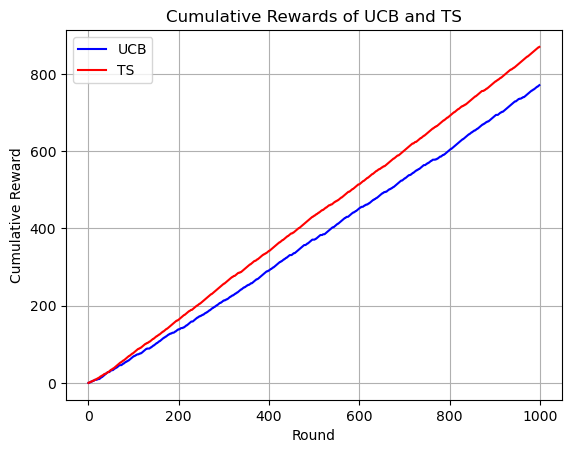

In [11]:
import matplotlib.pyplot as plt

#Plotting cumulative Reward
cumu_reward_UCB = np.cumsum(allrewards_UCB.sum(axis = 0))
cumu_reward_TS = np.cumsum(allrewards_TS.sum(axis = 0))

plt.plot(cumu_reward_UCB, color = 'blue', label = 'UCB')
plt.plot(cumu_reward_TS, color = 'red', label = 'TS')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards of UCB and TS')
plt.legend()
plt.grid(True)
plt.show()

The range of the $y$-axis in the above plot is quite large (it goes from 0 to 900). As a result, even if there seems a small discrepancy between the two lines, it might actually a substantial dollar amount. To have a better sense of scale, one usually plots the **cumulative regret** instead of the **cumulative reward**. The cumulative regret after $t$ rounds is defined as the difference between $t \times \max_i p_i$ and the money earned after $t$ rounds. Here $t \times \max_i p_i$ represents the money that we would expect to earn after $t$ rounds if we picked the best coin in each round. Thus we are comparing the actual money earned with the ideal scenario. We would, of course, prefer algorithms for which the cumulative regret is small. Here is a plot of the cumulative regrets of UCB and TS.

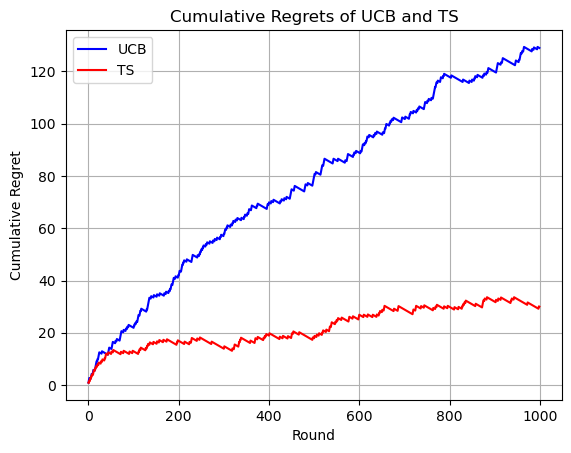

In [12]:
#Plotting Regrets (instead of Rewards):
cumu_regret_UCB = np.arange(1,T+1)*np.max(pvals) - cumu_reward_UCB
cumu_regret_TS = np.arange(1,T+1)*np.max(pvals) - cumu_reward_TS

plt.plot(cumu_regret_UCB, color = 'blue', label = 'UCB')
plt.plot(cumu_regret_TS, color = 'red', label = 'TS')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regrets of UCB and TS')
plt.legend()
plt.grid(True)
plt.show()

Note that the scale is now much smaller than before. The curves are quite jagged because of the randomness involved with the rewards. If we want smooth regret curves that we can use to compare the performances of the two algorithms, we can average the individual regrets over multiple simulation runs. This is done below.

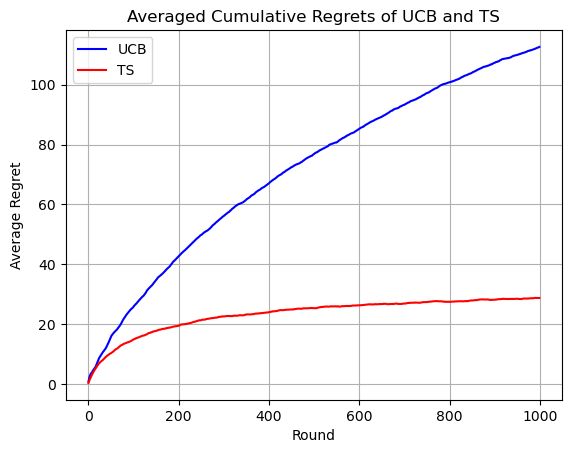

In [13]:
#Averaging over multiple simulation runs:
#To get smooth regrets, we can average individual regrets over multiple simulation runs:

#UCB:
m = 1
n_sims = 120
K = 9
T = 1000
allsims_UCB = np.zeros((n_sims, T))
for sim in range(n_sims):
    allrounds_UCB = np.zeros((K, T))
    allrewards_UCB = np.zeros((K, T))
    #Exploration phase:
    for tme in range(m*K):
        i_pick = tme % K
        allrounds_UCB[i_pick, tme] = 1
        i_reward = np.random.binomial(1, pvals[i_pick])
        allrewards_UCB[i_pick, tme] = i_reward
    for tme in range(m*K, T):
        num_tosses = allrounds_UCB.sum(axis=1)
        reward_coins = allrewards_UCB.sum(axis=1)
        phat = reward_coins/num_tosses
        delta = 1/(tme ** 3)
        #delta = 1
        ucb = phat + np.sqrt((np.log(1/delta))/(2*num_tosses))
        i_pick = np.argmax(ucb)
        allrounds_UCB[i_pick, tme] = 1
        i_reward = np.random.binomial(1, pvals[i_pick])
        allrewards_UCB[i_pick, tme] = i_reward
    cumu_reward_UCB = np.cumsum(allrewards_UCB.sum(axis = 0))
    cumu_regret_UCB = np.arange(1,T+1)*np.max(pvals) - cumu_reward_UCB
    allsims_UCB[sim,:] = cumu_regret_UCB
average_cumu_regret_UCB = np.mean(allsims_UCB, axis = 0)

#For Thompson Sampling:
allsims_TS = np.zeros((n_sims, T))
for sim in range(n_sims):
    allrounds_TS = np.zeros((K, T)) 
    allrewards_TS = np.zeros((K, T))
    for tme in range(T):
        num_tosses = allrounds_TS.sum(axis=1)
        reward_coins = allrewards_TS.sum(axis=1)
        samples = [np.random.beta(reward_coins[i] + 1, num_tosses[i] - reward_coins[i]+1) for i in range(K)]
        i_pick = np.argmax(samples)
        allrounds_TS[i_pick, tme] = 1
        i_reward = np.random.binomial(1, pvals[i_pick])
        allrewards_TS[i_pick, tme] = i_reward
    cumu_reward_TS = np.cumsum(allrewards_TS.sum(axis = 0))
    cumu_regret_TS = np.arange(1,T+1)*np.max(pvals) - cumu_reward_TS
    allsims_TS[sim,:] = cumu_regret_TS
average_cumu_regret_TS = np.mean(allsims_TS, axis = 0)

plt.plot(average_cumu_regret_UCB, color = 'blue', label = 'UCB')
plt.plot(average_cumu_regret_TS, color = 'red', label = 'TS')
plt.xlabel('Round')
plt.ylabel('Average Regret')
plt.title('Averaged Cumulative Regrets of UCB and TS')
plt.legend()
plt.grid(True)
plt.show()

These averaged regret curves are quite smooth. It is clear that Thompson sampling is doing much better than UCB. Across 1000 rounds, Thompson sampling is only losing about $\$35$ on average compared to the $\$900$ that we would have earned on average if we knew the best coin from beforehand. In the next lecture, we shall revisit these algorithms for more general multi-armed bandit problems.